In [1]:
# python
from tqdm.notebook import tqdm
import sys
import os
import importlib
# columnar analysis
import awkward as ak
import mplhep as hep
import numpy as np
from coffea.nanoevents import NanoEventsFactory, NanoAODSchema
# local
sys.path.insert(1, os.path.join(sys.path[0], '../..')) # fixme: there must be a better way to handle this...
from sidm.tools import sidm_processor, utilities
# always reload local modules to pick up changes during development
importlib.reload(sidm_processor)
importlib.reload(utilities)
# plotting
import matplotlib.pyplot as plt
utilities.set_plot_style()
%matplotlib inline

In [2]:
def structure(vari, cha1, cha2):
    print("4mu {0} structure: {1}".format(vari, cha1))
    print("2mu2e {0} structure: {1}".format(vari, cha2))
    
    return vari

In [3]:
samples_2mu2e = [
    '2mu2e_500GeV_5GeV_0p08mm',
    '2mu2e_500GeV_5GeV_0p8mm',
    '2mu2e_500GeV_5GeV_8p0mm',
    '2mu2e_500GeV_5GeV_40p0mm',
    '2mu2e_500GeV_5GeV_80p0mm',
]

samples_4mu = [
    '4mu_500GeV_5GeV_0p08mm',
    '4mu_500GeV_5GeV_0p8mm',
    '4mu_500GeV_5GeV_8p0mm',
    '4mu_500GeV_5GeV_40p0mm',
    '4mu_500GeV_5GeV_80p0mm',
]

In [4]:
fileset_4mu = utilities.make_fileset(samples_4mu, "llpNanoAOD_v1_merged")
fileset_2mu2e = utilities.make_fileset(samples_2mu2e, "llpNanoAOD_v1_merged")

events_2mu2e, events_4mu = {}, {}

for i in tqdm(samples_2mu2e):
    fname = fileset_2mu2e[i][0]
    print(fname)
    events_2mu2e[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon
    
for i in tqdm(samples_4mu):
    fname = fileset_4mu[i][0]
    print(fname)
    events_4mu[i] = NanoEventsFactory.from_root(
        fname,
        schemaclass=NanoAODSchema,
    ).events().Muon

  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo2Mu2e_MBs-500_MDp-5p0_ctau-80p0.root


  0%|          | 0/5 [00:00<?, ?it/s]

root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p08.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-0p8.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-8p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-40p0.root
root://xcache//store/user/dlee3/SIDM_BsTo2DpTo4Mu_MBs-500_MDp-5p0_ctau-80p0.root


In [6]:
print(events_2mu2e["2mu2e_500GeV_5GeV_0p08mm"].fields)

['dxy', 'dxyErr', 'dxybs', 'dz', 'dzErr', 'eta', 'ip3d', 'jetPtRelv2', 'jetRelIso', 'mass', 'miniPFRelIso_all', 'miniPFRelIso_chg', 'pfRelIso03_all', 'pfRelIso03_chg', 'pfRelIso04_all', 'phi', 'pt', 'ptErr', 'segmentComp', 'sip3d', 'softMva', 'tkRelIso', 'tunepRelPt', 'mvaLowPt', 'mvaTTH', 'charge', 'jetIdx', 'nStations', 'nTrackerLayers', 'pdgId', 'tightCharge', 'fsrPhotonIdx', 'highPtId', 'highPurity', 'inTimeMuon', 'isGlobal', 'isPFcand', 'isStandalone', 'isTracker', 'jetNDauCharged', 'looseId', 'mediumId', 'mediumPromptId', 'miniIsoId', 'multiIsoId', 'mvaId', 'mvaLowPtId', 'pfIsoId', 'puppiIsoId', 'softId', 'softMvaId', 'tightId', 'tkIsoId', 'triggerIdLoose', 'idx', 'trkPt', 'trkPtErr', 'dzPV', 'dzPVErr', 'dxyPVTraj', 'dxyPVTrajErr', 'dxyPVSigned', 'dxyPVSignedErr', 'ip3DPVSigned', 'ip3DPVSignedErr', 'dxyBS', 'dxyBSErr', 'dzBS', 'dzBSErr', 'dxyBSTraj', 'dxyBSTrajErr', 'dxyBSSigned', 'dxyBSSignedErr', 'ip3DBSSigned', 'ip3DBSSignedErr', 'trkNumPlanes', 'trkNumHits', 'trkNumDTHits', '

# Track layers and Hit

## nStations

4mu nStations structure: [[3, 4, 2, 3], [3, 4, 4, 1, 3], [4, 4, 3, ... [4, 3, 4], [4, 3, 4, 3], [4, 3, 4, 4]]
2mu2e nStations structure: [[4, 4], [4, 4], [4, 4, 3], [2, 4], [3, 3, ... 1], [4, 4], [3, 3], [2, 4, 1], [4, 3]]
4mu nStations structure: [[4, 3, 3, 3], [4, 2, 3, 4], [4, 2, 1, 4, ... 4], [4, 4, 4, 2], [3, 4, 1, 2, 0, 3]]
2mu2e nStations structure: [[2, 3], [2, 2], [4, 4], [4, 3], [3, 4], ... [3, 1, 4], [2, 3], [4, 4], [4, 4, 1]]
4mu nStations structure: [[4, 3, 4, 1, 4], [4, 4, 4], [4, 4, 4, 3, ... 4, 3], [4, 4, 4, 4], [0, 4, 3, 4, 4]]
2mu2e nStations structure: [[3, 3], [3, 3], [4, 4], [3, 1], [4, 4, ... [4, 3], [3, 4, 1, 1], [4, 1], [2, 4]]
4mu nStations structure: [[3, 3, 4, 3], [2, 4, 2, 1], [4, 3, 2], ... 3, 3, 2], [4, 0, 4, 1], [4, 3, 3, 3, 4]]
2mu2e nStations structure: [[4, 4], [4, 4], [3], [4], [4, 1, 3], [3, ... [2], [3, 4, 3], [3], [2, 1], [4, 4]]
4mu nStations structure: [[3, 2, 0], [], [2, 3, 3], [3], [3, 3, 4, ... [4, 3, 2], [3, 4, 3], [3, 4], [3, 3]]
2mu2e nStat

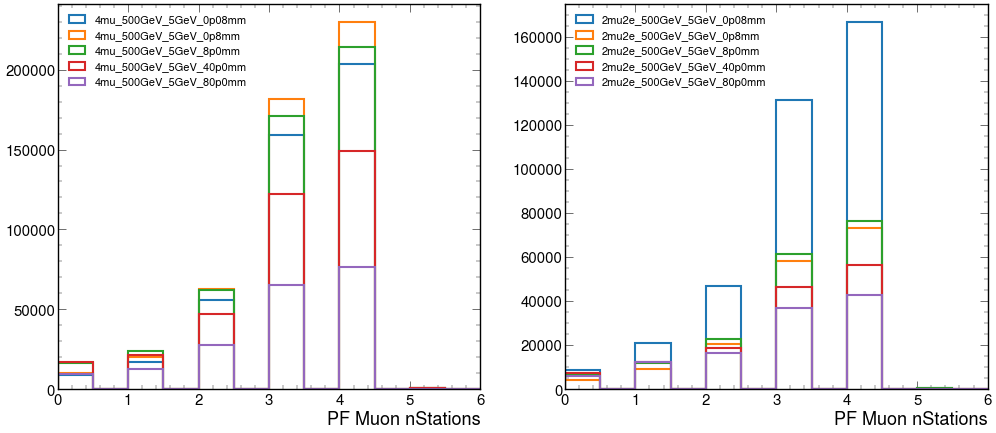

In [9]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("nStations", events_4mu[i_4mu].nStations, events_2mu2e[i_2mu].nStations)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].nStations), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].nStations), range=(0,6), alpha=1, bins=12, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,6)
ax[1].set_xlim(0,6)
ax[0].set_xlabel('PF Muon nStations')
ax[1].set_xlabel('PF Muon nStations')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16, loc='upper left')
plt.savefig("../Plots/PF_MUON/Track_and_hits/nStations.png", bbox_inches="tight")

## nTrackerLayers

4mu nTrackerLayers structure: [[14, 13, 14, 14], [15, 16, 15, 0, 14], ... [13, 16, 13, 16], [11, 11, 10, 13]]
2mu2e nTrackerLayers structure: [[13, 12], [14, 14], [8, 13, 10], [12, 12, ... 15], [14, 13], [0, 13, 13], [16, 15]]
4mu nTrackerLayers structure: [[11, 11, 6, 12], [14, 14, 14, 14], ... 14, 13, 14, 13], [12, 14, 12, 12, 6, 11]]
2mu2e nTrackerLayers structure: [[14, 14], [11, 11], [13, 13], [9, 11], ... 5, 11], [11, 10], [11, 13], [15, 11, 7]]
4mu nTrackerLayers structure: [[17, 9, 16, 0, 16], [0, 10, 10], [11, 13, ... [15, 16, 7, 8], [6, 7, 7, 12, 12]]
2mu2e nTrackerLayers structure: [[12, 13], [7, 6], [9, 8], [8, 7], ... 12, 11], [11, 9, 10, 13], [10, 10], [9, 8]]
4mu nTrackerLayers structure: [[0, 13, 0, 12], [0, 0, 0, 11], [9, 7, 13], ... 0, 6], [0, 0, 0, 0], [0, 0, 0, 0, 0]]
2mu2e nTrackerLayers structure: [[8, 9], [12, 12], [8], [0], [7, 0, 6, ... 10], [17, 15, 16], [0], [0, 14], [14, 14]]
4mu nTrackerLayers structure: [[0, 0, 4], [], [0, 0, 5], [0], [11, ... 10, 11, 13],

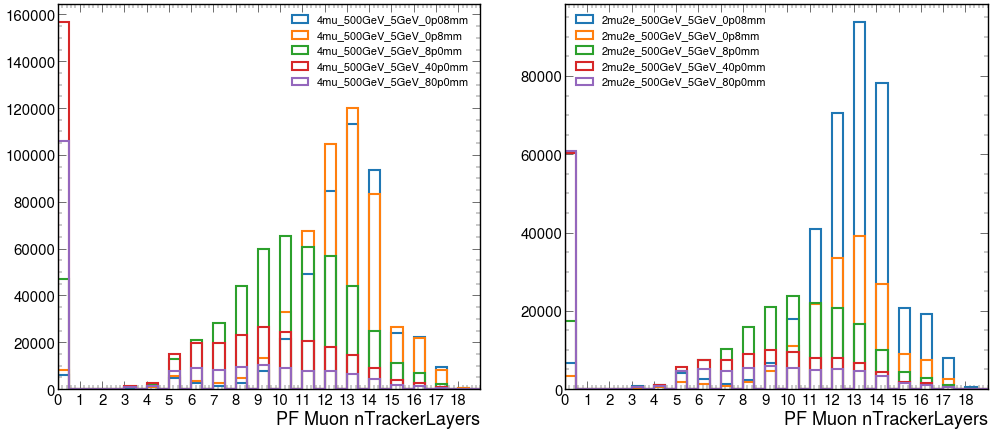

In [11]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("nTrackerLayers", events_4mu[i_4mu].nTrackerLayers, events_2mu2e[i_2mu].nTrackerLayers)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].nTrackerLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].nTrackerLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,19)
ax[1].set_xlim(0,19)
ax[0].set_xlabel('PF Muon nTrackerLayers')
ax[1].set_xlabel('PF Muon nTrackerLayers')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18])
plt.savefig("../Plots/PF_MUON/Track_and_hits/nTrackerLayers.png", bbox_inches="tight")

## trkPt

4mu trkPt structure: [[186, 177, 73.8, 65.7], [236, 183, 64.1, ... 49.2, 22.1], [168, 138, 88.2, 32.9]]
2mu2e trkPt structure: [[86.5, 25.5], [239, 6.4], [201, 17.8, 6.03, ... 23], [136, 135, 122], [160, 53.3]]
4mu trkPt structure: [[129, 99.1, 87.4, 59], [206, 184, 63.1, ... [215, 165, 78.4, 36.5, 17.8, 12.3]]
2mu2e trkPt structure: [[110, 82.6], [257, 6.2], [211, 41.3], ... 291, 14], [144, 97.7], [106, 6.16, 3.95]]
4mu trkPt structure: [[120, 98.7, 50.8, 23.1, 3.51], [404, ... 171], [1.94e+03, 180, 166, 99.5, 64.1]]
2mu2e trkPt structure: [[119, 98.3], [140, 123], [169, 17.7], ... 68, 9.36, 6.09], [219, 38.7], [148, 90.9]]
4mu trkPt structure: [[258, 186, 82.5, 24.3], [544, 194, ... 15.9], [1.73e+03, 1.14e+03, 206, 184, 29.4]]
2mu2e trkPt structure: [[159, 73.6], [168, 7.38], [99.9], [279, ... 4.09], [37.7], [763, 15.8], [166, 34.1]]
4mu trkPt structure: [[85.5, 16.5, 4.3], [], [598, 197, 103], ... 171, 73.3], [181, 146], [98.1, 21.3]]
2mu2e trkPt structure: [[222, 28.8, 21.7], [234]

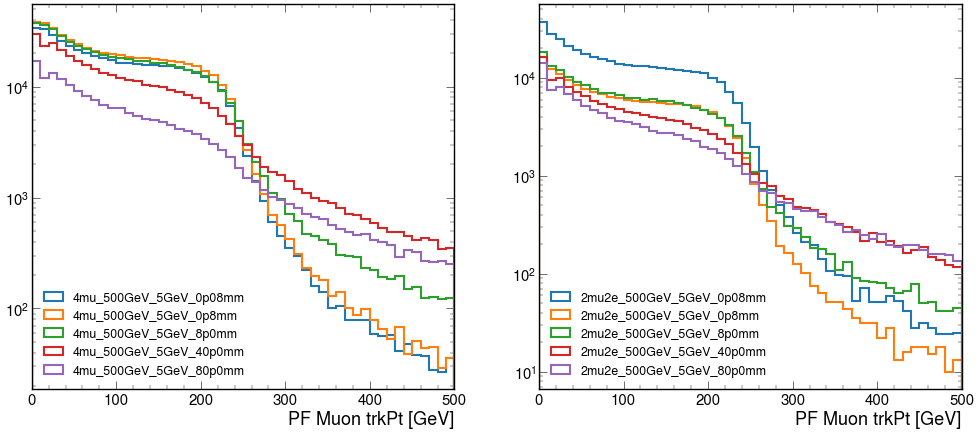

In [7]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkPt", events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkPt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkPt), range=(0,500), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,500)
ax[1].set_xlim(0,500)
ax[0].set_xlabel('PF Muon trkPt [GeV]')
ax[1].set_xlabel('PF Muon trkPt [GeV]')
ax[0].legend(fontsize=18, loc='lower left')
ax[1].legend(fontsize=18)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkPt.png", bbox_inches="tight")

## pt - trkPt

4mu pt - trkPt structure: [[1.48, 1.46, 0, 0], [-4, -0.305, -0.278, ... 0.0594, 0], [1.06, 0, 0.448, 0.199]]
2mu2e pt - trkPt structure: [[-1.06, 0.0188], [-0.00117, -0.00464], [-4.6, ... [0, 0, -1.73], [-2.38, 0]]
4mu pt - trkPt structure: [[1.94, 0.423, -0.901, 0], [-0.00981, ... [0.508, 3.34, 0, -0.0279, 0, -0.105]]
2mu2e pt - trkPt structure: [[0, -0.496], [-11, 0.00428], [-0.151, ... [-1.21, -1.74], [1.09, -0.00471, 0]]
4mu pt - trkPt structure: [[0.393, 0, 0, 0, 0.0529], [0, -0.00061, ... -120], [0, -0.000305, 0, 0.851, 0.0507]]
2mu2e pt - trkPt structure: [[0.32, 0], [-0.87, -13.9], [7.43, -0.128], ... 0.018, 0, 0], [-0.221, 0], [0, 0.85]]
4mu pt - trkPt structure: [[0, 0, 0, 1.11], [0, 0, 0, 0.045], [15.7, ... [0, 0, 0, 0], [0, 0, 0, 0, 0]]
2mu2e pt - trkPt structure: [[3.12, -0.128], [-0.271, -0.004], [19.4], [0, ... [0], [0, 0], [0.649, 0.0191]]
4mu pt - trkPt structure: [[0, 0, -0.000826], [], [0, 0, -10.5], ... [0, 0, -3.8], [0, -3.61], [0, 0.00024]]
2mu2e pt - trkPt struct

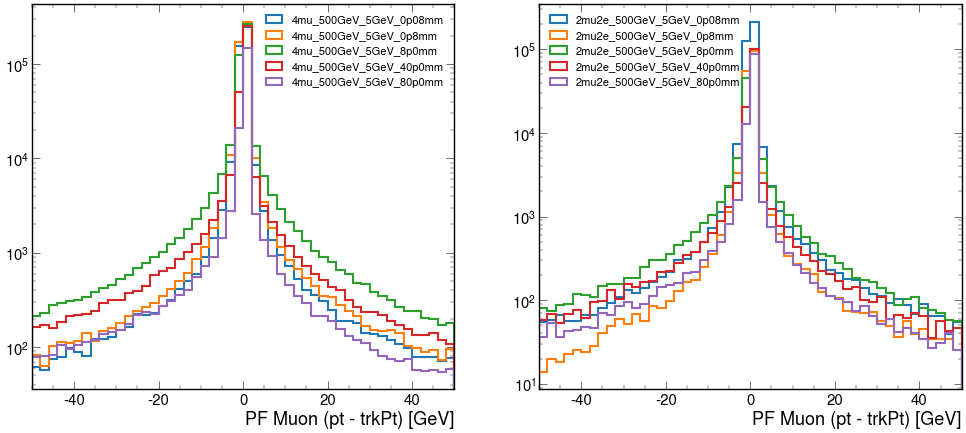

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("pt - trkPt", events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt, events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].pt - events_4mu[i_4mu].trkPt), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].pt - events_2mu2e[i_2mu].trkPt), range=(-50,50), alpha=1, bins=50, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(-50,50)
ax[1].set_xlim(-50,50)
ax[0].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[1].set_xlabel('PF Muon (pt - trkPt) [GeV]')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_yscale("log")
ax[1].set_yscale("log")
plt.savefig("../Plots/PF_MUON/Track_and_hits/pt-trkPt.png", bbox_inches="tight")

## trkNumPlanes

4mu trkNumPlanes structure: [[3, 4, 0, 0], [1, 3, 4, 0, 4], [4, 4, 3, ... [4, 3, 4], [0, 4, 4, 0], [4, 0, 4, 4]]
2mu2e trkNumPlanes structure: [[3, 4], [4, 3], [2, 4, 3], [0, 4], [0, 3, ... 0], [4, 3], [3, 3], [2, 0, 4], [4, 0]]
4mu trkNumPlanes structure: [[4, 3, 4, 0], [4, 3, 3, 4], [0, 0, 4, 1, ... 3], [4, 4, 3, 2], [3, 4, 0, 3, 0, 4]]
2mu2e trkNumPlanes structure: [[0, 3], [2, 3], [4, 4], [3, 2], [4, 4], ... [3, 0, 4], [3, 4], [4, 4], [4, 4, 0]]
4mu trkNumPlanes structure: [[4, 3, 0, 2, 4], [4, 4, 4], [4, 4, 4, 3, ... 3, 4], [0, 3, 3, 4], [0, 3, 0, 3, 0]]
2mu2e trkNumPlanes structure: [[3, 0], [2, 2], [3, 4], [0, 3], [4, 4, ... [4, 3], [3, 4, 0, 0], [4, 0], [0, 3]]
4mu trkNumPlanes structure: [[3, 0, 4, 4], [3, 4, 3, 3], [4, 3, 4], ... 4, 4, 2], [4, 2, 3, 1], [0, 4, 2, 3, 4]]
2mu2e trkNumPlanes structure: [[4, 4], [4, 4], [3], [4], [2, 0, 3], [3, ... [0], [4, 3, 4], [4], [2, 0], [4, 4]]
4mu trkNumPlanes structure: [[4, 2, 3], [], [2, 3, 4], [3], [4, 3, 4, ... [4, 3, 2], [3, 0, 4], 

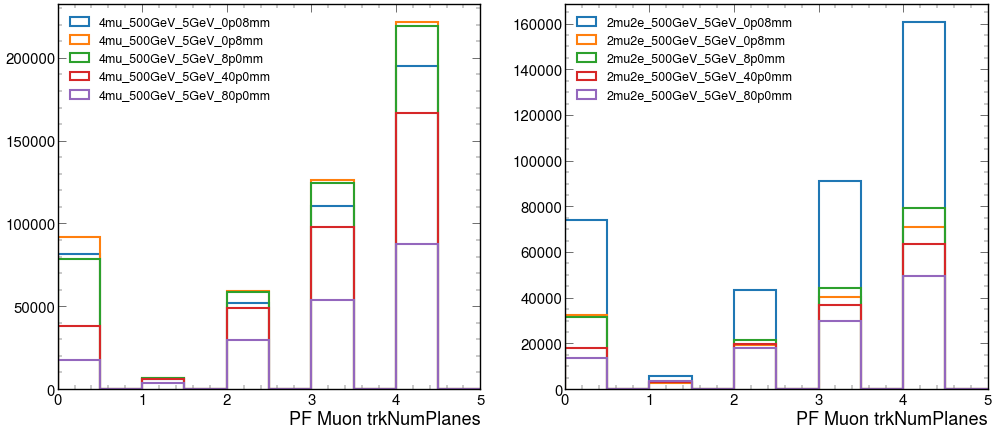

In [16]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumPlanes", events_4mu[i_4mu].trkNumPlanes, events_2mu2e[i_2mu].trkNumPlanes)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumPlanes), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumPlanes), range=(0,5), alpha=1, bins=10, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,5)
ax[1].set_xlim(0,5)
ax[0].set_xlabel('PF Muon trkNumPlanes')
ax[1].set_xlabel('PF Muon trkNumPlanes')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumPlanes.png", bbox_inches="tight")

## trkNumHits

4mu trkNumHits structure: [[25, 33, 0, 0], [18, 30, 19, 0, 30], [17, ... 34], [0, 20, 34, 0], [28, 0, 43, 28]]
2mu2e trkNumHits structure: [[16, 24], [49, 29], [27, 27, 21], [0, 34, ... 18], [36, 24], [8, 0, 34], [18, 0]]
4mu trkNumHits structure: [[15, 18, 36, 0], [45, 22, 36, 49], [0, ... [21, 47, 18, 22], [27, 23, 0, 28, 0, 19]]
2mu2e trkNumHits structure: [[0, 23], [10, 27], [46, 50], [31, 25], ... 0, 26], [18, 36], [43, 44], [31, 27, 0]]
4mu trkNumHits structure: [[24, 34, 0, 14, 24], [39, 49, 49], [48, ... [0, 18, 18, 24], [0, 31, 0, 14, 0]]
2mu2e trkNumHits structure: [[34, 0], [33, 27], [28, 48], [0, 27], ... 38], [16, 27, 0, 0], [43, 0], [0, 31]]
4mu trkNumHits structure: [[23, 0, 39, 11], [12, 39, 15, 29], [48, ... [37, 5, 21, 7], [0, 37, 10, 39, 43]]
2mu2e trkNumHits structure: [[35, 35], [50, 46], [24], [47], [21, 0, ... [19, 20, 19], [28], [19, 0], [48, 37]]
4mu trkNumHits structure: [[35, 12, 24], [], [18, 33, 47], [28], ... 25], [29, 0, 45], [36, 33], [36, 33]]
2mu2e trk

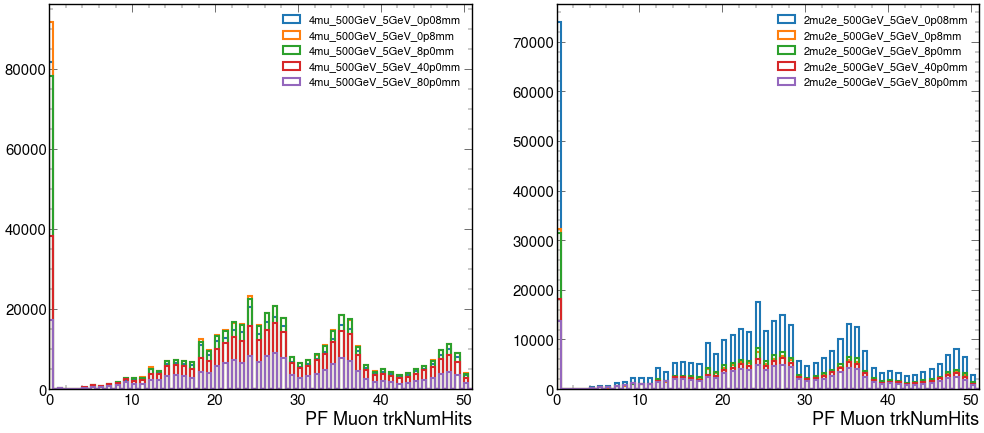

In [13]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumHits", events_4mu[i_4mu].trkNumHits, events_2mu2e[i_2mu].trkNumHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumHits), range=(0,51), alpha=1, bins=102, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumHits), range=(0,51), alpha=1, bins=102, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,51)
ax[1].set_xlim(0,51)
ax[0].set_xlabel('PF Muon trkNumHits')
ax[1].set_xlabel('PF Muon trkNumHits')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumHits.png", bbox_inches="tight")

## trkNumDTHits

4mu trkNumDTHits structure: [[21, 28, 0, 0], [0, 0, 0, 0, 0], [12, 43, ... 17, 29], [0, 0, 28, 0], [0, 0, 38, 0]]
2mu2e trkNumDTHits structure: [[0, 0], [43, 26], [16, 23, 0], [0, 30], ... [0, 0], [32, 22], [0, 0, 29], [0, 0]]
4mu trkNumDTHits structure: [[0, 15, 31, 0], [39, 18, 31, 44], [0, 0, ... [0, 41, 0, 19], [24, 0, 0, 23, 0, 0]]
2mu2e trkNumDTHits structure: [[0, 19], [7, 22], [41, 44], [12, 15], ... 0, 0], [15, 31], [38, 39], [0, 0, 0]]
4mu trkNumDTHits structure: [[0, 31, 0, 12, 0], [33, 44, 44], [42, 34, ... 32], [0, 0, 0, 0], [0, 12, 0, 0, 0]]
2mu2e trkNumDTHits structure: [[30, 0], [23, 23], [24, 42], [0, 22], ... 34], [7, 0, 0, 0], [37, 0], [0, 27]]
4mu trkNumDTHits structure: [[19, 0, 34, 0], [8, 34, 12, 24], [42, 19, ... 9], [32, 0, 0, 0], [0, 32, 8, 35, 37]]
2mu2e trkNumDTHits structure: [[29, 29], [44, 41], [0], [41], [12, 0, ... [0, 0, 0], [24], [17, 0], [42, 32]]
4mu trkNumDTHits structure: [[30, 0, 12], [], [15, 30, 42], [23], ... 31, 22], [26, 0, 41], [31, 0], [32

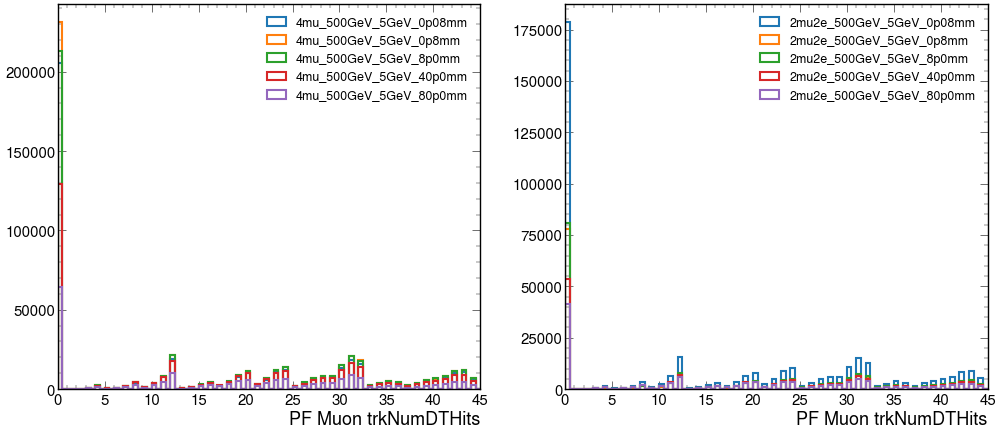

In [19]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumDTHits", events_4mu[i_4mu].trkNumDTHits, events_2mu2e[i_2mu].trkNumDTHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumDTHits), range=(0,45), alpha=1, bins=90, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumDTHits), range=(0,45), alpha=1, bins=90, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,45)
ax[1].set_xlim(0,45)
ax[0].set_xlabel('PF Muon trkNumDTHits')
ax[1].set_xlabel('PF Muon trkNumDTHits')
ax[0].legend(fontsize=18)
ax[1].legend(fontsize=18)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumDTHits.png", bbox_inches="tight")

## trkNumCSCHits

4mu trkNumCSCHits structure: [[0, 0, 0, 0], [18, 30, 18, 0, 28], [0, 0, ... 0, 0], [0, 18, 0, 0], [24, 0, 0, 24]]
2mu2e trkNumCSCHits structure: [[16, 24], [0, 0], [6, 0, 18], [0, 0], ... [24, 18], [0, 0], [8, 0, 0], [16, 0]]
4mu trkNumCSCHits structure: [[12, 0, 0, 0], [0, 0, 0, 0], [0, 0, 10, ... [21, 0, 18, 0], [0, 20, 0, 0, 0, 17]]
2mu2e trkNumCSCHits structure: [[0, 0], [0, 0], [0, 0], [15, 6], [0, ... [16, 0, 22], [0, 0], [0, 0], [29, 23, 0]]
4mu trkNumCSCHits structure: [[23, 0, 0, 0, 24], [0, 0, 0], [0, 0, 0, ... 0], [0, 15, 18, 24], [0, 15, 0, 14, 0]]
2mu2e trkNumCSCHits structure: [[0, 0], [6, 0], [0, 0], [0, 0], [0, 0, ... [0, 0], [6, 24, 0, 0], [0, 0], [0, 0]]
4mu trkNumCSCHits structure: [[0, 0, 0, 9], [0, 0, 0, 0], [0, 0, 16], ... 0, 6], [0, 4, 17, 6], [0, 0, 0, 0, 0]]
2mu2e trkNumCSCHits structure: [[0, 0], [0, 0], [21], [0], [6, 0, 12], ... [0], [17, 18, 17], [0], [0, 0], [0, 0]]
4mu trkNumCSCHits structure: [[0, 11, 9], [], [0, 0, 0], [0], [18, 0, ... [0, 0, 0], [0, 0,

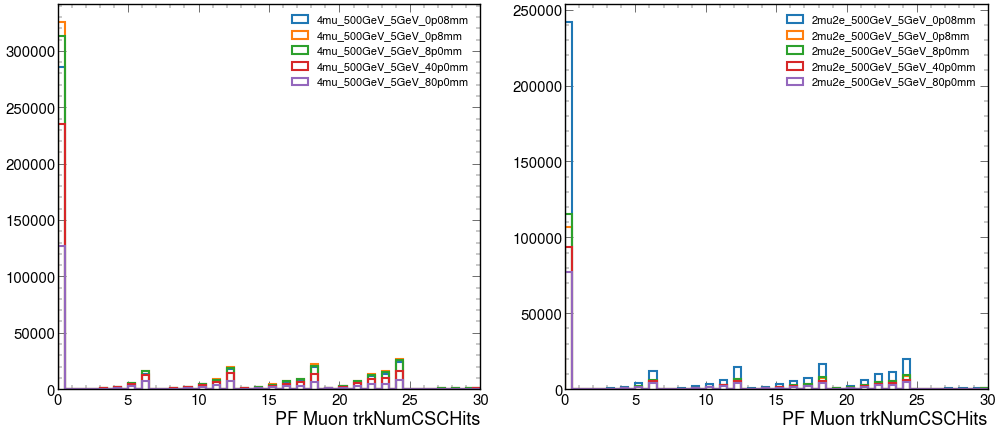

In [20]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumCSCHits", events_4mu[i_4mu].trkNumCSCHits, events_2mu2e[i_2mu].trkNumCSCHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumCSCHits), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumCSCHits), range=(0,30), alpha=1, bins=60, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,30)
ax[1].set_xlim(0,30)
ax[0].set_xlabel('PF Muon trkNumCSCHits')
ax[1].set_xlabel('PF Muon trkNumCSCHits')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumCSCHits.png", bbox_inches="tight")

## trkNumPixelHits

4mu trkNumPixelHits structure: [[4, 3, 4, 4], [4, 7, 8, -1, 3], [3, 4, 2, ... [3, 3, 2], [3, 6, 4, 4], [4, 3, 4, 3]]
2mu2e trkNumPixelHits structure: [[7, 5], [4, 4], [2, 4, 2], [3, 3], [4, ... 3], [5, 5], [5, 5], [-1, 3, 3], [4, 7]]
4mu trkNumPixelHits structure: [[5, 2, 0, 5], [5, 4, 4, 4], [3, 4, 0, 3, ... 6], [6, 3, 6, 3], [2, 4, 4, 2, 5, 0]]
2mu2e trkNumPixelHits structure: [[4, 4], [2, 2], [5, 3], [3, 3], [4, 4], ... [3, 2, 3], [2, 2], [3, 3], [4, 3, 6]]
4mu trkNumPixelHits structure: [[7, 1, 7, -1, 7], [-1, 0, 0], [1, 3, 1, 2, ... 3, 2], [5, 4, 0, 0], [0, 0, 0, 1, 1]]
2mu2e trkNumPixelHits structure: [[3, 3], [0, 0], [0, 0], [0, 0], [3, 3, ... [2, 2], [3, 2, 7, 6], [1, 1], [0, 0]]
4mu trkNumPixelHits structure: [[-1, 1, -1, 0], [-1, -1, -1, 4], [0, ... [-1, -1, -1, -1], [-1, -1, -1, -1, -1]]
2mu2e trkNumPixelHits structure: [[0, 1], [4, 3], [0], [-1], [0, -1, 0], ... [1], [5, 5, 4], [-1], [-1, 7], [4, 4]]
4mu trkNumPixelHits structure: [[-1, -1, 2], [], [-1, -1, 0], [-1], [0, ..

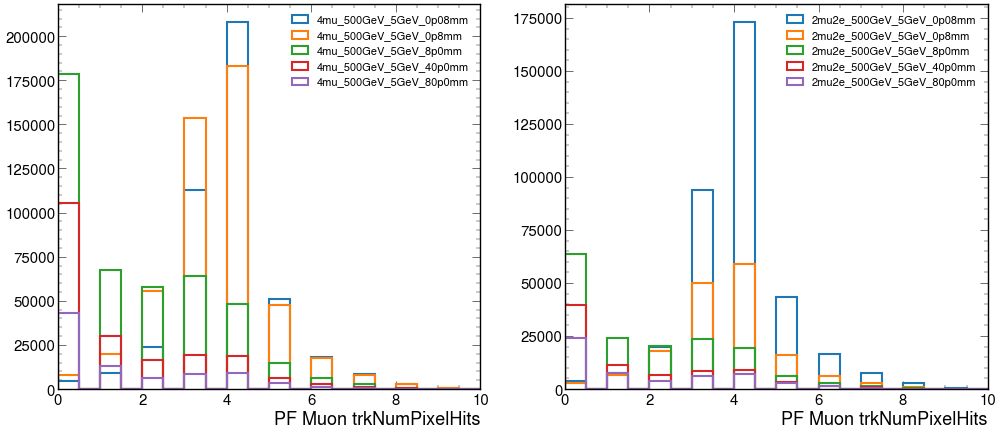

In [27]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumPixelHits", events_4mu[i_4mu].trkNumPixelHits, events_2mu2e[i_2mu].trkNumPixelHits)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumPixelHits), range=(0,10), alpha=1, bins=20, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumPixelHits), range=(0,10), alpha=1, bins=20, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,10)
ax[1].set_xlim(0,10)
ax[0].set_xlabel('PF Muon trkNumPixelHits')
ax[1].set_xlabel('PF Muon trkNumPixelHits')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumPixelHits.png", bbox_inches="tight")

## trkNumTrkLayers

4mu trkNumTrkLayers structure: [[14, 13, 14, 14], [15, 16, 15, -1, 14], ... [13, 16, 13, 16], [11, 11, 10, 13]]
2mu2e trkNumTrkLayers structure: [[13, 12], [14, 14], [8, 13, 10], [12, 12, ... 15], [14, 13], [-1, 13, 13], [16, 15]]
4mu trkNumTrkLayers structure: [[11, 11, 6, 12], [14, 14, 14, 14], ... 14, 13, 14, 13], [12, 14, 12, 12, 6, 11]]
2mu2e trkNumTrkLayers structure: [[14, 14], [11, 11], [13, 13], [9, 11], ... 5, 11], [11, 10], [11, 13], [15, 11, 7]]
4mu trkNumTrkLayers structure: [[17, 9, 16, -1, 16], [-1, 10, 10], [11, ... [15, 16, 7, 8], [6, 7, 7, 12, 12]]
2mu2e trkNumTrkLayers structure: [[12, 13], [7, 6], [9, 8], [8, 7], ... 12, 11], [11, 9, 10, 13], [10, 10], [9, 8]]
4mu trkNumTrkLayers structure: [[-1, 13, -1, 12], [-1, -1, -1, 11], [9, ... [-1, -1, -1, -1], [-1, -1, -1, -1, -1]]
2mu2e trkNumTrkLayers structure: [[8, 9], [12, 12], [8], [-1], [7, -1, ... [17, 15, 16], [-1], [-1, 14], [14, 14]]
4mu trkNumTrkLayers structure: [[-1, -1, 4], [], [-1, -1, 5], [-1], ... 13], [-1

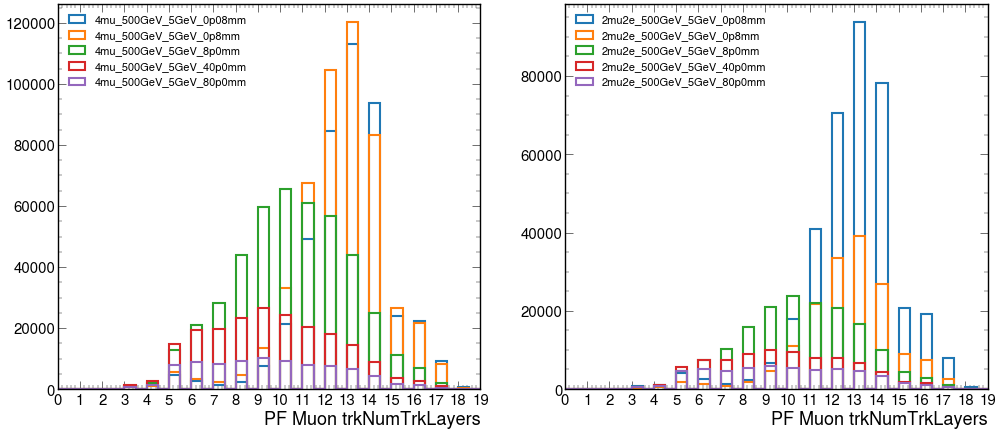

In [28]:
plt.style.use(hep.style.CMS)
fig, ax = plt.subplots(1, 2, figsize=(24,10))
for i_2mu, i_4mu in zip(samples_2mu2e,samples_4mu):
    structure("trkNumTrkLayers", events_4mu[i_4mu].trkNumTrkLayers, events_2mu2e[i_2mu].trkNumTrkLayers)
    ax[0].hist(ak.flatten(events_4mu[i_4mu].trkNumTrkLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_4mu)
    ax[1].hist(ak.flatten(events_2mu2e[i_2mu].trkNumTrkLayers), range=(0,19), alpha=1, bins=38, histtype='step', linewidth=3, label=i_2mu)
    
ax[0].set_xlim(0,19)
ax[1].set_xlim(0,19)
ax[0].set_xlabel('PF Muon trkNumTrkLayers')
ax[1].set_xlabel('PF Muon trkNumTrkLayers')
ax[0].legend(fontsize=16)
ax[1].legend(fontsize=16)
ax[0].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
ax[1].set_xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19])
plt.savefig("../Plots/PF_MUON/Track_and_hits/trkNumTrkLayers.png", bbox_inches="tight")